In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("datasets/4_categories.csv")
df

,coord_x,coord_y,category
0,124.703038,350.089618,a
1,127.948668,417.534316,a
2,80.817806,395.823458,a
3,126.107518,383.713659,a
4,121.863843,355.151238,a
...,...,...,...
913,597.447179,80.049176,d
914,552.212837,77.267115,d
915,582.085716,58.248150,d
916,581.338270,55.497262,d


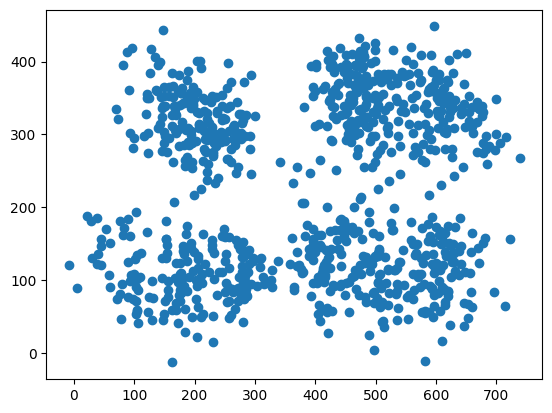

In [3]:
plt.scatter(df["coord_x"], df["coord_y"]);

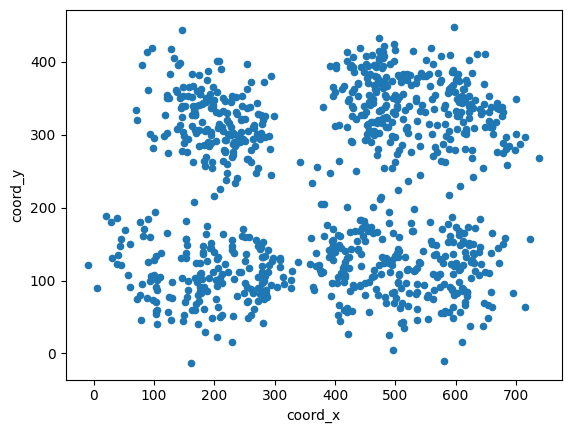

In [4]:
df.plot.scatter(x="coord_x", y="coord_y");

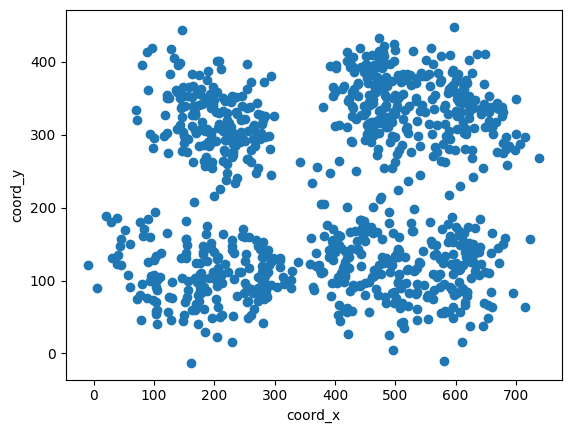

In [5]:
plt.scatter(df["coord_x"], df["coord_y"]);
plt.xlabel("coord_x");
plt.ylabel("coord_y");

In [6]:
df["category"].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

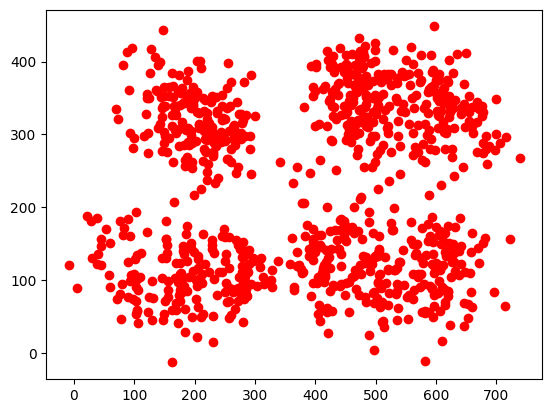

In [7]:
plt.scatter(df["coord_x"], df["coord_y"], c = "red");

In [11]:
d_colors = {
    "a": "red",
    "b" : "blue",
    "c" : "yellow",
    "d" : "green"
}

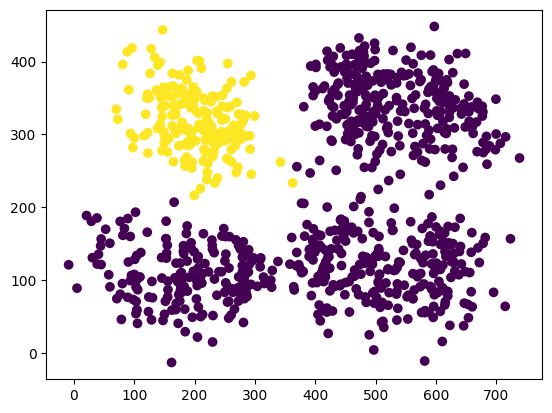

In [8]:
plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"] ==  'a');

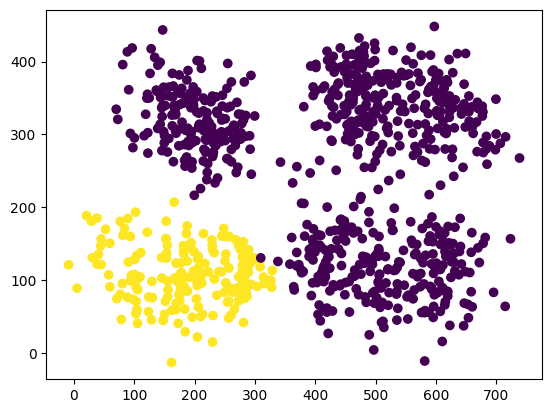

In [9]:
plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"] ==  'b');

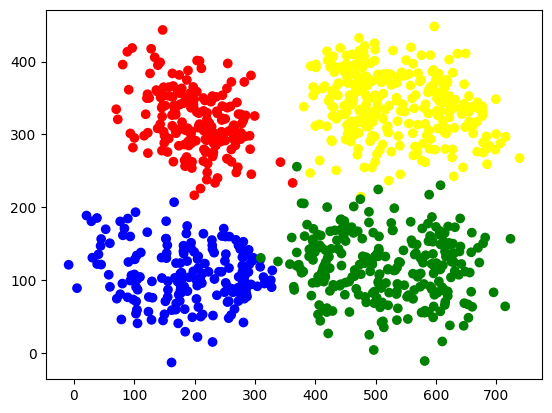

In [13]:
plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"].replace(d_colors));

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier()
model


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
data = df[["coord_x", "coord_y"]]      # x
data

,coord_x,coord_y
0,124.703038,350.089618
1,127.948668,417.534316
2,80.817806,395.823458
3,126.107518,383.713659
4,121.863843,355.151238
...,...,...
913,597.447179,80.049176
914,552.212837,77.267115
915,582.085716,58.248150
916,581.338270,55.497262


In [17]:
target =  df[["category"] ]
target

,category
0,a
1,a
2,a
3,a
4,a
...,...
913,d
914,d
915,d
916,d


In [18]:
model.fit(data, target)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


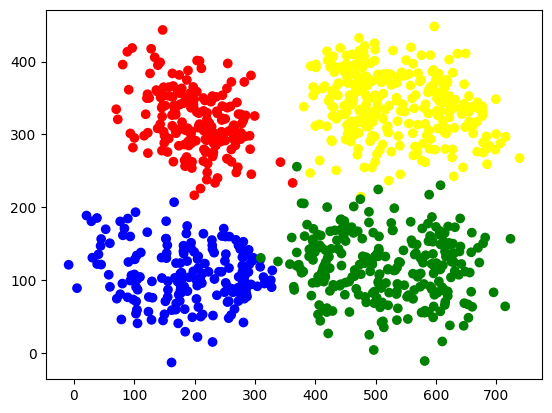

In [19]:
plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"].replace(d_colors));

In [20]:
model.predict([[150, 150]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['b'], dtype=object)

In [21]:
model.predict([[450, 300]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['c'], dtype=object)

In [22]:
model.predict([[330, 300]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['a'], dtype=object)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree_model = DecisionTreeClassifier()
tree_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
tree_model.fit(data, target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
tree_model.predict([[150, 150]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['b'], dtype=object)

# pip install graphviz


In [27]:
from sklearn.tree import export_graphviz
import graphviz

In [31]:
exported_data = export_graphviz(tree_model, feature_names=["coord_x", "coord_y"], class_names=["a", "b", "c", "d"], filled=True, rounded=True)
exported_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_y <= 231.903\\ngini = 0.74\\nsamples = 918\\nvalue = [190, 180, 288, 260]\\nclass = c", fillcolor="#f7fbfe"] ;\n1 [label="coord_x <= 333.474\\ngini = 0.491\\nsamples = 442\\nvalue = [2, 180, 1, 259]\\nclass = d", fillcolor="#f3c3f7"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="coord_y <= 211.813\\ngini = 0.032\\nsamples = 183\\nvalue = [2, 180, 0, 1]\\nclass = b", fillcolor="#4ae53c"] ;\n1 -> 2 ;\n3 [label="coord_x <= 309.371\\ngini = 0.011\\nsamples = 181\\nvalue = [0, 180, 0, 1]\\nclass = b", fillcolor="#48e53a"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 175\\nvalue = [0, 175, 0, 0]\\nclass = b", fillcolor="#47e539"] ;\n3 -> 4 ;\n5 [label="coord_y <= 122.069\\ngini = 0.278\\nsamples = 6\\nvalue = [0, 5, 0, 1]\\nclass = b", fillcolor="#6cea61"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 

In [49]:
my_tree_graph = graphviz.Source(exported_data)
my_tree_graph.render("4 Categories", format="png")
my_tree_graph.view()

'4 Categories.pdf'

In [40]:
ELEMENTS_NUMBER = 800

In [47]:
orizontal_y = np.ones(ELEMENTS_NUMBER) * 200
max_range_x = np.arange(0, ELEMENTS_NUMBER)

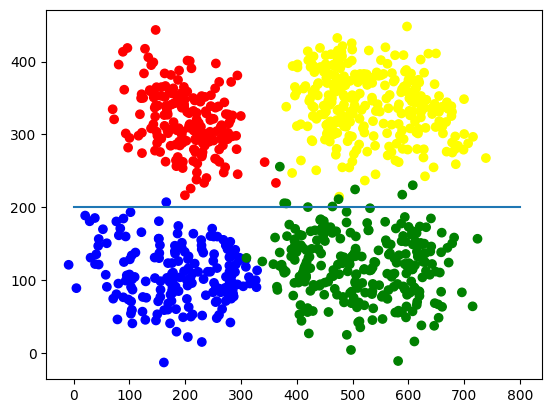

In [48]:
plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"].replace(d_colors));
plt.plot(max_range_x, orizontal_y)

In [50]:
max_range_x = np.arange(0, 800)
orizontal_y = np.ones(800) * 231

In [51]:
max_range_y = np.arange(0, 500)
vertical_x = np.ones(500) * 333

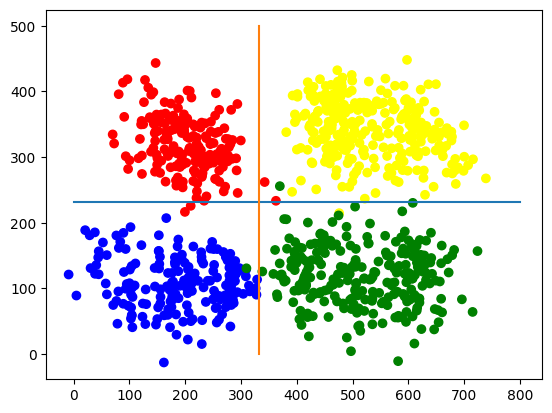

In [52]:
plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"].replace(d_colors));
plt.plot(max_range_x, orizontal_y)
plt.plot(vertical_x, max_range_y)

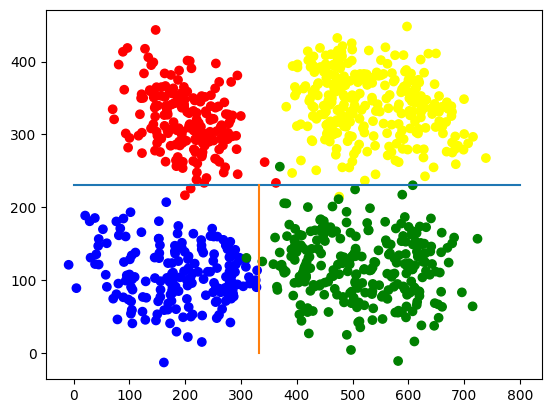

In [53]:
max_range_y = np.arange(0, 231)
vertical_x = np.ones(231) * 333

plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"].replace(d_colors));
plt.plot(max_range_x, orizontal_y)
plt.plot(vertical_x, max_range_y)

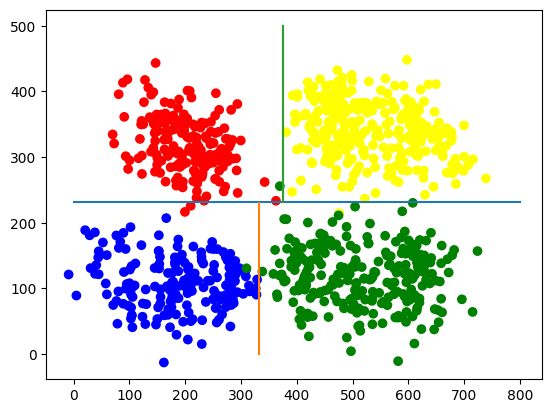

In [57]:
max_range_y = np.arange(0, 231)
vertical_x = np.ones(231) * 333


upper_max_range_y = np.arange(231, 500)
upper_vertical_x = np.ones(500 - 231) * 375

plt.scatter(df["coord_x"], df["coord_y"], c =  df["category"].replace(d_colors));
plt.plot(max_range_x, orizontal_y)
plt.plot(vertical_x, max_range_y)
plt.plot(upper_vertical_x, upper_max_range_y)